In [2]:
# Imports
# Gymnasium imports
import gymnasium as gym 
from gymnasium import Env
from gymnasium.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Import helpers
import numpy as np
import pandas as pd
import random
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from collections import deque

# Import stable baselines
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env

# Import tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

# Import custom classes
from Environment.env_v9 import *
from Functions.visualization_functions import *

# Import custom functions
from Functions.deep_q_learning import *

In [3]:
# Configuration of the network
with open('./Config/network_config_v1.json') as file:
    network_config = file.read()

EP_LENGTH = 100 # Length of the episode

In [4]:
def load_config(config_file):

    with open(config_file, "r") as f:
        config = json.load(f)
    return config

def make_env(config_file="config.json"):

    config = load_config(config_file)

    env = SS_Mngmt_Env(
        network_config=network_config,
        EP_LENGTH=EP_LENGTH,
        render_mode="human",
        model_type="fixed-order",
        stockout_cost=config["stockout_cost"],
        order_cost=config["order_cost"],
        item_cost=config["item_cost"],
        stock_cost=config["stock_cost"],
        item_prize=config["item_prize"],
        progressive_stock_cost=config["progressive_stock_cost"],
        stock_out_max=1000,
        order_quantities=config["order_quantities"],
        demand_mean=config["demand_mean"],
        demand_std=config["demand_std"],
        demand_noise=config["demand_noise"],
        demand_noise_std=config["demand_noise_std"],
        demand_prob=config["demand_prob"],
        extreme = True,
        seasonality=True,
    )

    return env

env = make_env("./Config/env_config_v0.json")

check_env(env, warn=True)

/Users/jonasrenfer/miniconda3/envs/rl-scm/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:263: UserWarning: Your observation order_queues has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


In [23]:
# Main simulation loop
episodes = 20
EP_LENGTH = 100  # Define the length of the episode

# To store simulation results
simulation_results = []

for episode in range(1, episodes + 1):
    state = env.reset()[0]
    done = False
    score = 0
    step_count = 0  # Track steps taken in the environment

    while not done:
        # Get current stock levels
        stock = state["inventory_levels"]

        # Determine action based on the current step count
        if step_count % 8 == 0:
            action = [2] * len(stock)  # Action for every eighth step
        else:
            action = [0] * len(stock)  # Default action for other steps

        # Take action and update environment
        n_state, reward, done, info, _ = env.step(action)
        score += reward
        step_count += 1  # Increment the step count

        # Update state
        state = n_state

    # Store results for this episode
    simulation_results.append({
        "episode": episode,
        "score": score,
        "timesteps": step_count
    })

    print(f"Episode {episode} Score: {score:.2f} Timesteps: {step_count}")

# Save results to a JSON file
output_file = "./Data/Evaluation/evaluation_results_fixed-order.json"
with open(output_file, "w") as file:
    json.dump(simulation_results, file, indent=4)

print(f"Simulation results saved to {output_file}")

Episode 1 Score: -33830.85 Timesteps: 100
Episode 2 Score: -32808.14 Timesteps: 100
Episode 3 Score: -25134.67 Timesteps: 100
Episode 4 Score: -37386.80 Timesteps: 100
Episode 5 Score: 9224.63 Timesteps: 100
Episode 6 Score: -9947.29 Timesteps: 100
Episode 7 Score: -21239.86 Timesteps: 100
Episode 8 Score: -57003.68 Timesteps: 100
Episode 9 Score: -8203.34 Timesteps: 100
Episode 10 Score: -12702.21 Timesteps: 100
Episode 11 Score: -6528.43 Timesteps: 100
Episode 12 Score: 13352.59 Timesteps: 100
Episode 13 Score: -47271.56 Timesteps: 100
Episode 14 Score: -30120.07 Timesteps: 100
Episode 15 Score: -3872.35 Timesteps: 100
Episode 16 Score: 4148.27 Timesteps: 100
Episode 17 Score: -33403.18 Timesteps: 100
Episode 18 Score: 540.82 Timesteps: 100
Episode 19 Score: 716.93 Timesteps: 100
Episode 20 Score: 5252.28 Timesteps: 100
Simulation results saved to ./Data/Evaluation/evaluation_results_fixed_order.json


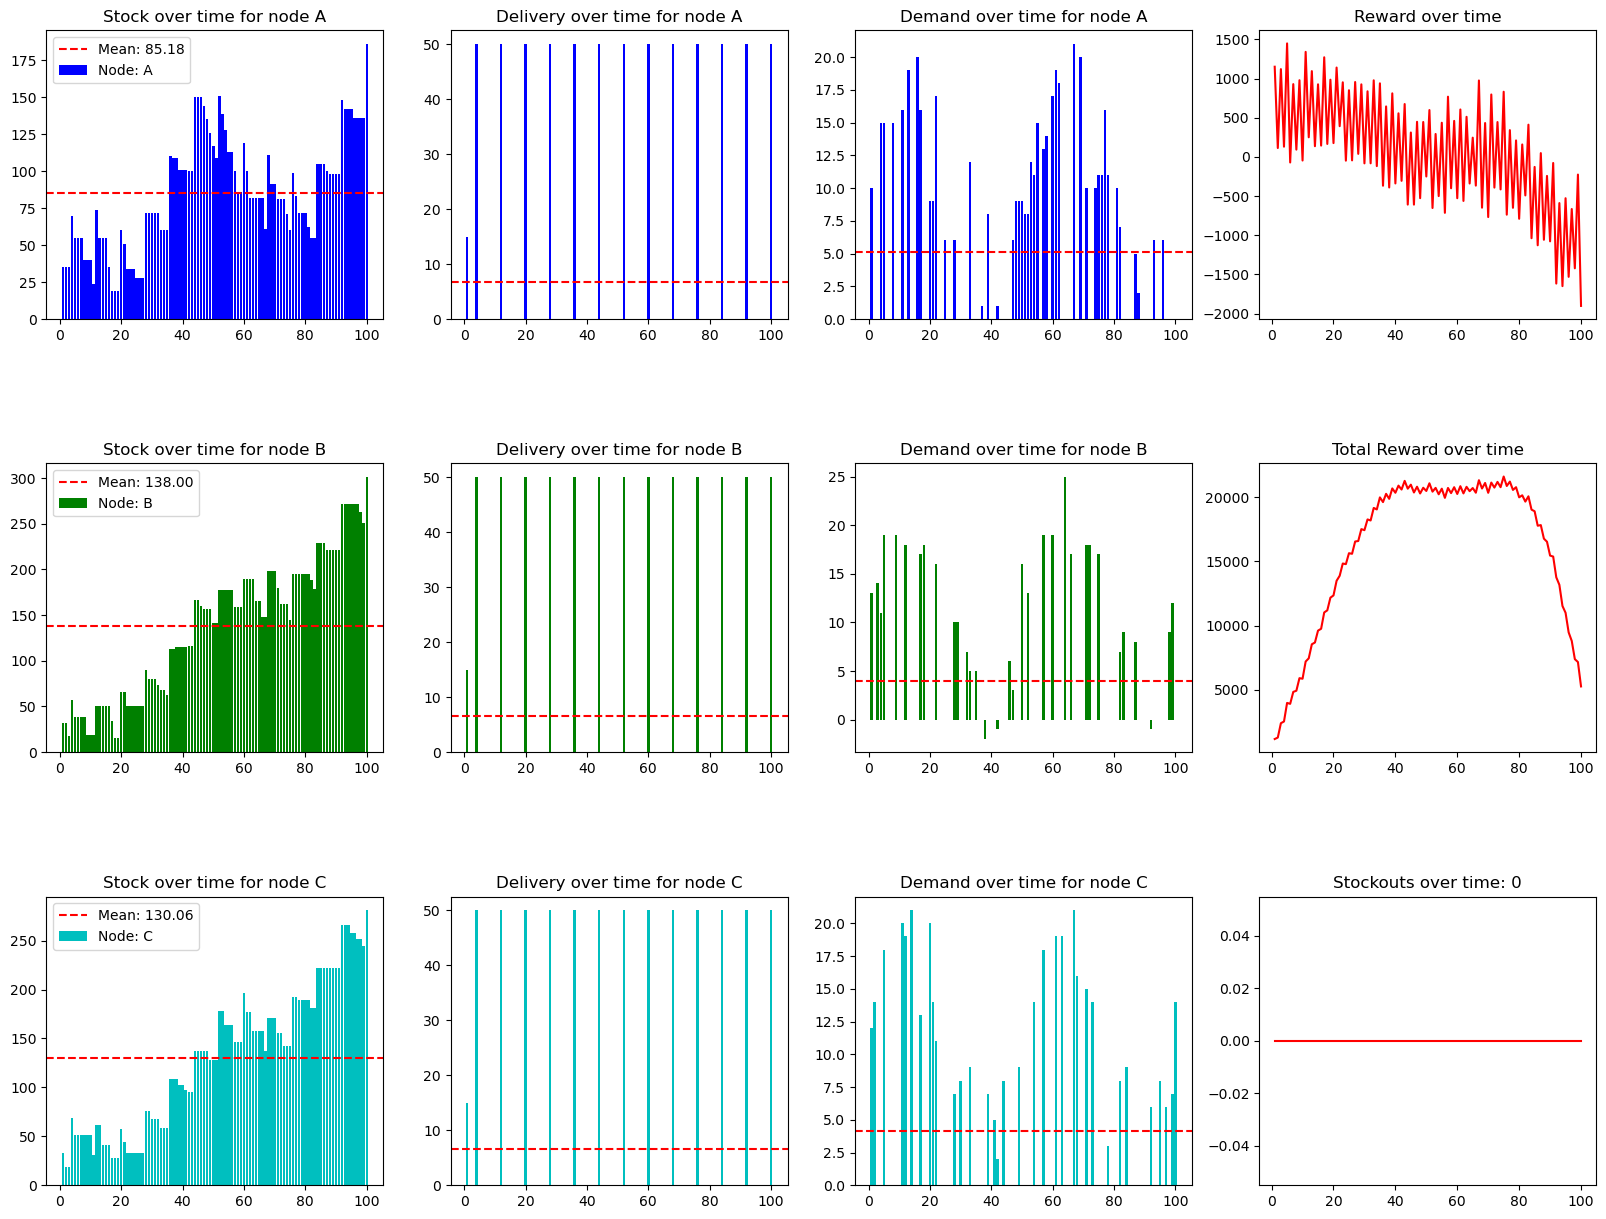

In [24]:
df = pd.read_csv('./Data/2024-12-17_environment-data_fixed_order.csv')
plot_data(df)